In [1]:
import os
import sys

spark_path = "D:/spark"

os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path
os.environ['PYSPARK_PYTHON'] = sys.executable

sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

from pyspark import SparkContext
from pyspark import SparkConf

conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")


sc = SparkContext("local", conf=conf)
print sc

In [2]:
# The usual preamble
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
na_values = ['NO CLUE', 'N/A', '0', '']
ufo_df = pd.read_csv("complete.csv", error_bad_lines=False, na_values=na_values)

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
ufo_df['latitude'][19]

nan

In [6]:
rows_with_slash_lat = ufo_df['latitude'].str.contains('/').fillna(False)
len(ufo_df[rows_with_slash_lat])

196

In [7]:
ufo_df['latitude'][rows_with_slash_lat] = np.nan

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [44]:
LatLng = []
for i in range(len(ufo_df)):
    latitude = float(ufo_df['latitude'][i])
    longitude = ufo_df['longitude'][i]
    if not np.isnan(latitude) and not np.isnan(longitude):
        LatLng.append([latitude, longitude])

In [45]:
LatLng[:20]

[[29.8830556, -97.941111099999986],
 [29.38421, -98.581081999999995],
 [53.2, -2.9166669999999999],
 [28.9783333, -96.645833299999993],
 [21.4180556, -157.80361110000001],
 [36.595, -82.188888900000009],
 [51.434722, -3.1800000000000002],
 [41.1175, -73.408333299999995],
 [33.5861111, -86.286111099999985],
 [30.2947222, -82.984166700000003],
 [33.9163889, -118.35166670000001],
 [35.2333333, -82.734444400000001],
 [40.6686111, -73.527500000000003],
 [37.1536111, -83.761944400000004],
 [35.8238889, -80.253611099999986],
 [36.8430556, -83.321944400000007],
 [42.5377778, -83.2330556],
 [41.3252778, -72.193611099999998],
 [32.364167, -64.678611000000004],
 [42.3916667, -71.566666699999999]]

In [46]:
from pyspark.mllib.clustering import KMeans, KMeansModel

In [47]:
ufo_rdd = sc.parallelize(LatLng)

In [48]:
# Build the model (cluster the data)
clusters = KMeans.train(ufo_rdd, 2, maxIterations=10, initializationMode="random")

In [49]:
print clusters.clusterCenters

[array([ 37.92827712, -45.38226138]), array([  38.15276754, -100.77547094])]


In [50]:
cluster_1 = []
cluster_2 = []
for i in range(len(LatLng)):
    cls = clusters.predict(LatLng[i])
    if cls == 0:
        cluster_1.append(LatLng[i])
    elif cls == 1:
        cluster_2.append(LatLng[i])

In [51]:
# Mendapatkan titik-titik hasil cluster
print len(cluster_1)
print len(cluster_2)
print len(LatLng)

10751
76434
87185


In [52]:
import matplotlib.pyplot as plt

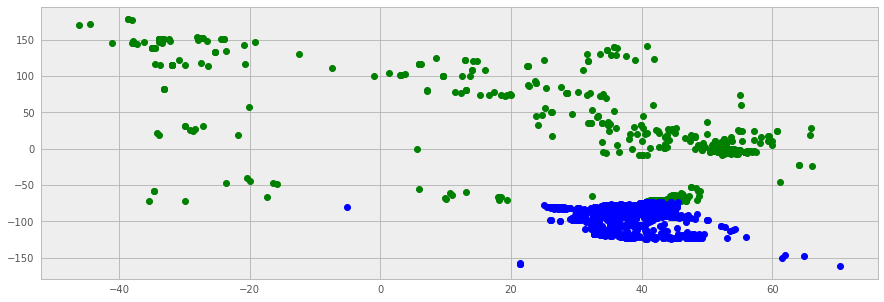

In [53]:
for i in range(1000):
    line = plt.plot(cluster_1[i][0], cluster_1[i][1], "ro")
    plt.setp(line, color="g", linewidth=2.0)
for i in range(1000):
    line = plt.plot(cluster_2[i][0], cluster_2[i][1], "ro")
    plt.setp(line, color="b", linewidth=2.0)